# PREDICTING DEPRESSION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, roc_auc_score,roc_curve,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
dep_data = pd.read_csv(r"C:\Users\meena\OneDrive\Desktop\Mini Project\Mini_Project_Depression.csv")
dep_data

,Participants,Openness,Restraint,Transcendence,Interpersonal,DASS_21,GHQ_12,SEC,Age,Gender,...,Prudence,Self_regulation,Social_intelligence,Spirituality,Teamwork,Zest,DASS_anxiety,DASS_depression,DASS_stress,Depression
0,1,102,51,116,121,15,24,11,26,Female,...,18,13,16,15,22,20,0,7,8,0
1,2,96,49,121,100,18,15,20,25,Male,...,15,20,15,17,15,18,4,5,9,0
2,3,99,58,120,87,0,7,20,26,Male,...,17,22,17,11,12,15,0,0,0,0
3,4,119,68,131,84,15,18,18,25,Female,...,24,15,21,12,11,19,1,4,10,0
4,5,127,61,151,97,37,19,14,49,Female,...,18,24,15,21,18,21,14,8,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,940,120,60,149,121,40,20,19,36,Male,...,20,14,20,25,19,22,13,10,17,1
940,941,109,41,123,126,11,18,16,74,Female,...,12,18,22,17,21,15,1,4,6,0
941,942,140,60,159,124,13,6,23,27,Male,...,12,17,22,23,15,25,5,2,6,0
942,943,78,43,127,99,13,20,11,26,Female,...,18,16,17,16,17,19,1,4,8,0


In the dataset, DASS_21 represents Depression Anxiety Stress Scale - 21 which contains total of 21 questions out of which each 
Depression, Anxiety, Stress has 7 question each respectively.

In [3]:
dep_data.isnull().sum()

Participants              0
Openness                  0
Restraint                 0
Transcendence             0
Interpersonal             0
DASS_21                   0
GHQ_12                    0
SEC                       0
Age                       0
Gender                    0
Work                      0
Student                   1
Appreciation_of_beauty    0
Bravery                   0
Creativity                0
Curiosity                 0
Fairness                  0
Forgiveness               0
Gratitude                 0
Honesty                   0
Hope                      0
Humilty                   0
Humor                     0
Judgement                 0
Kindness                  0
Leadership                0
Love                      0
Love_of_learning          0
Perseverance              0
Perspective               0
Prudence                  0
Self_regulation           0
Social_intelligence       0
Spirituality              0
Teamwork                  0
Zest                

In [4]:
dep_data = dep_data.dropna()

In [5]:
dep_data

,Participants,Openness,Restraint,Transcendence,Interpersonal,DASS_21,GHQ_12,SEC,Age,Gender,...,Prudence,Self_regulation,Social_intelligence,Spirituality,Teamwork,Zest,DASS_anxiety,DASS_depression,DASS_stress,Depression
0,1,102,51,116,121,15,24,11,26,Female,...,18,13,16,15,22,20,0,7,8,0
1,2,96,49,121,100,18,15,20,25,Male,...,15,20,15,17,15,18,4,5,9,0
2,3,99,58,120,87,0,7,20,26,Male,...,17,22,17,11,12,15,0,0,0,0
3,4,119,68,131,84,15,18,18,25,Female,...,24,15,21,12,11,19,1,4,10,0
4,5,127,61,151,97,37,19,14,49,Female,...,18,24,15,21,18,21,14,8,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,940,120,60,149,121,40,20,19,36,Male,...,20,14,20,25,19,22,13,10,17,1
940,941,109,41,123,126,11,18,16,74,Female,...,12,18,22,17,21,15,1,4,6,0
941,942,140,60,159,124,13,6,23,27,Male,...,12,17,22,23,15,25,5,2,6,0
942,943,78,43,127,99,13,20,11,26,Female,...,18,16,17,16,17,19,1,4,8,0


In [6]:
dep_data1 = dep_data[["Openness", "Restraint", "Transcendence", "Interpersonal", "DASS_21", "GHQ_12", "SEC", "Age", "Appreciation_of_beauty", "Bravery", "Creativity", "Curiosity", "Fairness", "Forgiveness", "Gratitude", "Honesty", "Hope"]]

In [7]:
dep_data1.describe()

,Openness,Restraint,Transcendence,Interpersonal,DASS_21,GHQ_12,SEC,Age,Appreciation_of_beauty,Bravery,Creativity,Curiosity,Fairness,Forgiveness,Gratitude,Honesty,Hope
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,109.275716,55.917285,123.927890,111.517497,15.098621,17.016967,15.051962,37.247084,20.027572,18.300106,18.255567,17.892895,19.667020,17.358431,18.872747,21.310710,17.489926
std,13.448822,7.502409,17.800949,12.362855,10.703286,4.902632,3.988100,14.503511,2.883308,3.191694,3.409025,3.295461,2.642428,3.764124,3.350813,2.329986,3.561956
min,65.000000,26.000000,56.000000,57.000000,0.000000,3.000000,5.000000,18.000000,10.000000,8.000000,7.000000,6.000000,8.000000,5.000000,6.000000,12.000000,5.000000
25%,101.000000,51.000000,113.000000,104.000000,7.000000,14.000000,12.000000,25.000000,18.000000,16.000000,16.000000,16.000000,18.000000,15.000000,17.000000,20.000000,15.000000
50%,109.000000,56.000000,124.000000,111.000000,13.000000,17.000000,15.000000,32.000000,20.000000,18.000000,18.000000,18.000000,20.000000,18.000000,19.000000,21.000000,18.000000
75%,118.000000,61.000000,135.000000,120.000000,20.000000,20.000000,18.000000,50.000000,22.000000,20.000000,20.000000,20.000000,21.000000,20.000000,21.000000,23.000000,20.000000
max,144.000000,74.000000,171.000000,146.000000,61.000000,31.000000,25.000000,81.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000


In [8]:
dep_data2 = dep_data[["Humilty", "Humor", "Judgement", "Kindness", "Leadership", "Love", "Love_of_learning", "Perseverance", 
                      "Perspective", "Prudence", "Self_regulation", "Social_intelligence", "Spirituality", "Teamwork", 
                      "Zest", "DASS_anxiety", "DASS_depression", "DASS_stress"]]

In [9]:
dep_data2.describe()

,Humilty,Humor,Judgement,Kindness,Leadership,Love,Love_of_learning,Perseverance,Perspective,Prudence,Self_regulation,Social_intelligence,Spirituality,Teamwork,Zest,DASS_anxiety,DASS_depression,DASS_stress
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,17.556734,18.626723,20.470838,20.641569,17.978791,19.374337,17.571580,18.876988,17.745493,17.700954,16.760339,18.628844,15.291622,18.314952,17.261930,2.908802,5.136797,7.053022
std,3.241634,3.341276,2.650752,2.580930,3.031255,3.278777,3.605392,3.413432,3.196820,3.289575,3.517297,2.698214,4.096346,2.696514,3.542029,3.338980,4.476804,4.349067
min,6.000000,10.000000,9.000000,11.000000,8.000000,7.000000,7.000000,5.000000,6.000000,8.000000,6.000000,7.000000,5.000000,8.000000,6.000000,0.000000,0.000000,0.000000
25%,15.000000,16.000000,19.000000,19.000000,16.000000,17.000000,15.000000,17.000000,16.000000,16.000000,14.500000,17.000000,12.000000,17.000000,15.000000,1.000000,2.000000,4.000000
50%,18.000000,19.000000,20.000000,21.000000,18.000000,20.000000,17.000000,19.000000,18.000000,18.000000,17.000000,19.000000,15.000000,18.000000,17.000000,2.000000,4.000000,7.000000
75%,20.000000,21.000000,22.000000,23.000000,20.000000,22.000000,20.000000,21.000000,20.000000,20.000000,19.000000,20.000000,18.000000,20.000000,20.000000,4.000000,7.000000,9.000000
max,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,20.000000,21.000000,21.000000


In [10]:
dep_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 943
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Participants            943 non-null    int64 
 1   Openness                943 non-null    int64 
 2   Restraint               943 non-null    int64 
 3   Transcendence           943 non-null    int64 
 4   Interpersonal           943 non-null    int64 
 5   DASS_21                 943 non-null    int64 
 6   GHQ_12                  943 non-null    int64 
 7   SEC                     943 non-null    int64 
 8   Age                     943 non-null    int64 
 9   Gender                  943 non-null    object
 10  Work                    943 non-null    int64 
 11  Student                 943 non-null    object
 12  Appreciation_of_beauty  943 non-null    int64 
 13  Bravery                 943 non-null    int64 
 14  Creativity              943 non-null    int64 
 15  Curios

In [11]:
dep_data.value_counts("DASS_depression")

DASS_depression
1     105
3     104
0     102
2     101
4      98
5      91
7      68
6      62
8      38
9      31
11     29
10     23
14     18
13     15
12     12
15     12
16      7
20      7
17      5
18      5
19      5
21      5
dtype: int64

In [12]:
dep_data.value_counts("Depression")

Depression
0    800
1    143
dtype: int64

In [13]:
dep_data.drop('Participants', axis =1)

,Openness,Restraint,Transcendence,Interpersonal,DASS_21,GHQ_12,SEC,Age,Gender,Work,...,Prudence,Self_regulation,Social_intelligence,Spirituality,Teamwork,Zest,DASS_anxiety,DASS_depression,DASS_stress,Depression
0,102,51,116,121,15,24,11,26,Female,5,...,18,13,16,15,22,20,0,7,8,0
1,96,49,121,100,18,15,20,25,Male,1,...,15,20,15,17,15,18,4,5,9,0
2,99,58,120,87,0,7,20,26,Male,1,...,17,22,17,11,12,15,0,0,0,0
3,119,68,131,84,15,18,18,25,Female,6,...,24,15,21,12,11,19,1,4,10,0
4,127,61,151,97,37,19,14,49,Female,5,...,18,24,15,21,18,21,14,8,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,120,60,149,121,40,20,19,36,Male,3,...,20,14,20,25,19,22,13,10,17,1
940,109,41,123,126,11,18,16,74,Female,4,...,12,18,22,17,21,15,1,4,6,0
941,140,60,159,124,13,6,23,27,Male,5,...,12,17,22,23,15,25,5,2,6,0
942,78,43,127,99,13,20,11,26,Female,4,...,18,16,17,16,17,19,1,4,8,0


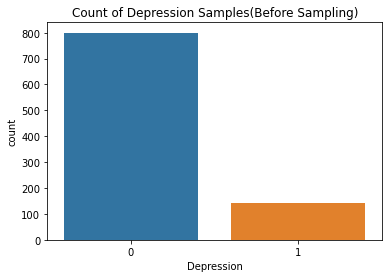

In [14]:
#Before Sampling

sns.countplot(x= "Depression", data=dep_data)
plt.title("Count of Depression Samples(Before Sampling)")
plt.show()


From Figure we can say that,
1) The data consists more data for 'no depression' and the number of observations is approximately equal to 800.

2) The number of 'depression' samples is approximately equal to 150.

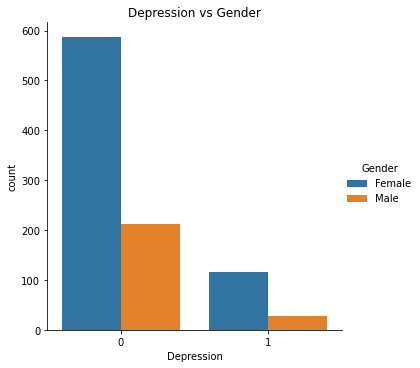

In [15]:
sns.catplot(x="Depression", data = dep_data, kind = "count", hue = "Gender")
plt.title("Depression vs Gender")
plt.show()

From Figure , we can conclude that

1) 'Females' experience higher depression compared to males.

2) The number of 'females' who experience depression is approximately equal to 120 while the number of males who experience depression is approximately equal to 20.

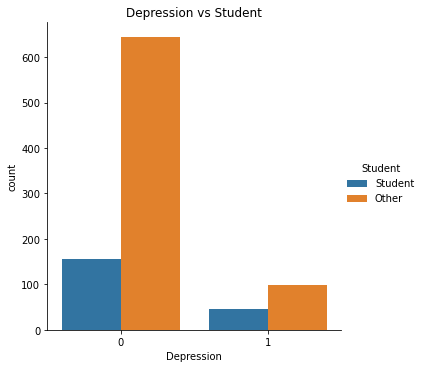

In [16]:
sns.catplot(x="Depression", data = dep_data, kind = "count", hue = "Student")
plt.title("Depression vs Student")
plt.show()

From Figure, we can conclude that

1) Depression was found to be lower in students.

2) The number of 'students' who got affected with depression is roughly equal to 40 and in the 'other' category it is found to be equal to 100.

In [17]:
X = dep_data[["Openness","Restraint","Transcendence", "Interpersonal", "DASS_21", "GHQ_12", "SEC","Age", "Appreciation_of_beauty", "Bravery","Creativity", "Curiosity", "Fairness", "Forgiveness", "Gratitude", "Honesty", "Hope", "Humilty", "Humor", "Judgement", "Kindness", "Leadership", 
              "Love", "Love_of_learning", "Perseverance", "Perspective", "Prudence", "Self_regulation", "Social_intelligence", "Spirituality", "Teamwork", "Zest", "DASS_anxiety", "DASS_depression", "DASS_stress"]]

y = dep_data["Depression"]

In [18]:
df  = pd.concat([X,y], axis = 1)

In [19]:
df  

,Openness,Restraint,Transcendence,Interpersonal,DASS_21,GHQ_12,SEC,Age,Appreciation_of_beauty,Bravery,...,Prudence,Self_regulation,Social_intelligence,Spirituality,Teamwork,Zest,DASS_anxiety,DASS_depression,DASS_stress,Depression
0,102,51,116,121,15,24,11,26,19,17,...,18,13,16,15,22,20,0,7,8,0
1,96,49,121,100,18,15,20,25,18,16,...,15,20,15,17,15,18,4,5,9,0
2,99,58,120,87,0,7,20,26,15,16,...,17,22,17,11,12,15,0,0,0,0
3,119,68,131,84,15,18,18,25,22,15,...,24,15,21,12,11,19,1,4,10,0
4,127,61,151,97,37,19,14,49,21,18,...,18,24,15,21,18,21,14,8,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,120,60,149,121,40,20,19,36,25,22,...,20,14,20,25,19,22,13,10,17,1
940,109,41,123,126,11,18,16,74,24,22,...,12,18,22,17,21,15,1,4,6,0
941,140,60,159,124,13,6,23,27,23,23,...,12,17,22,23,15,25,5,2,6,0
942,78,43,127,99,13,20,11,26,17,13,...,18,16,17,16,17,19,1,4,8,0


One of the main features which determine the Depressed state of a person is his score on the feature 'DASS_depression'. 

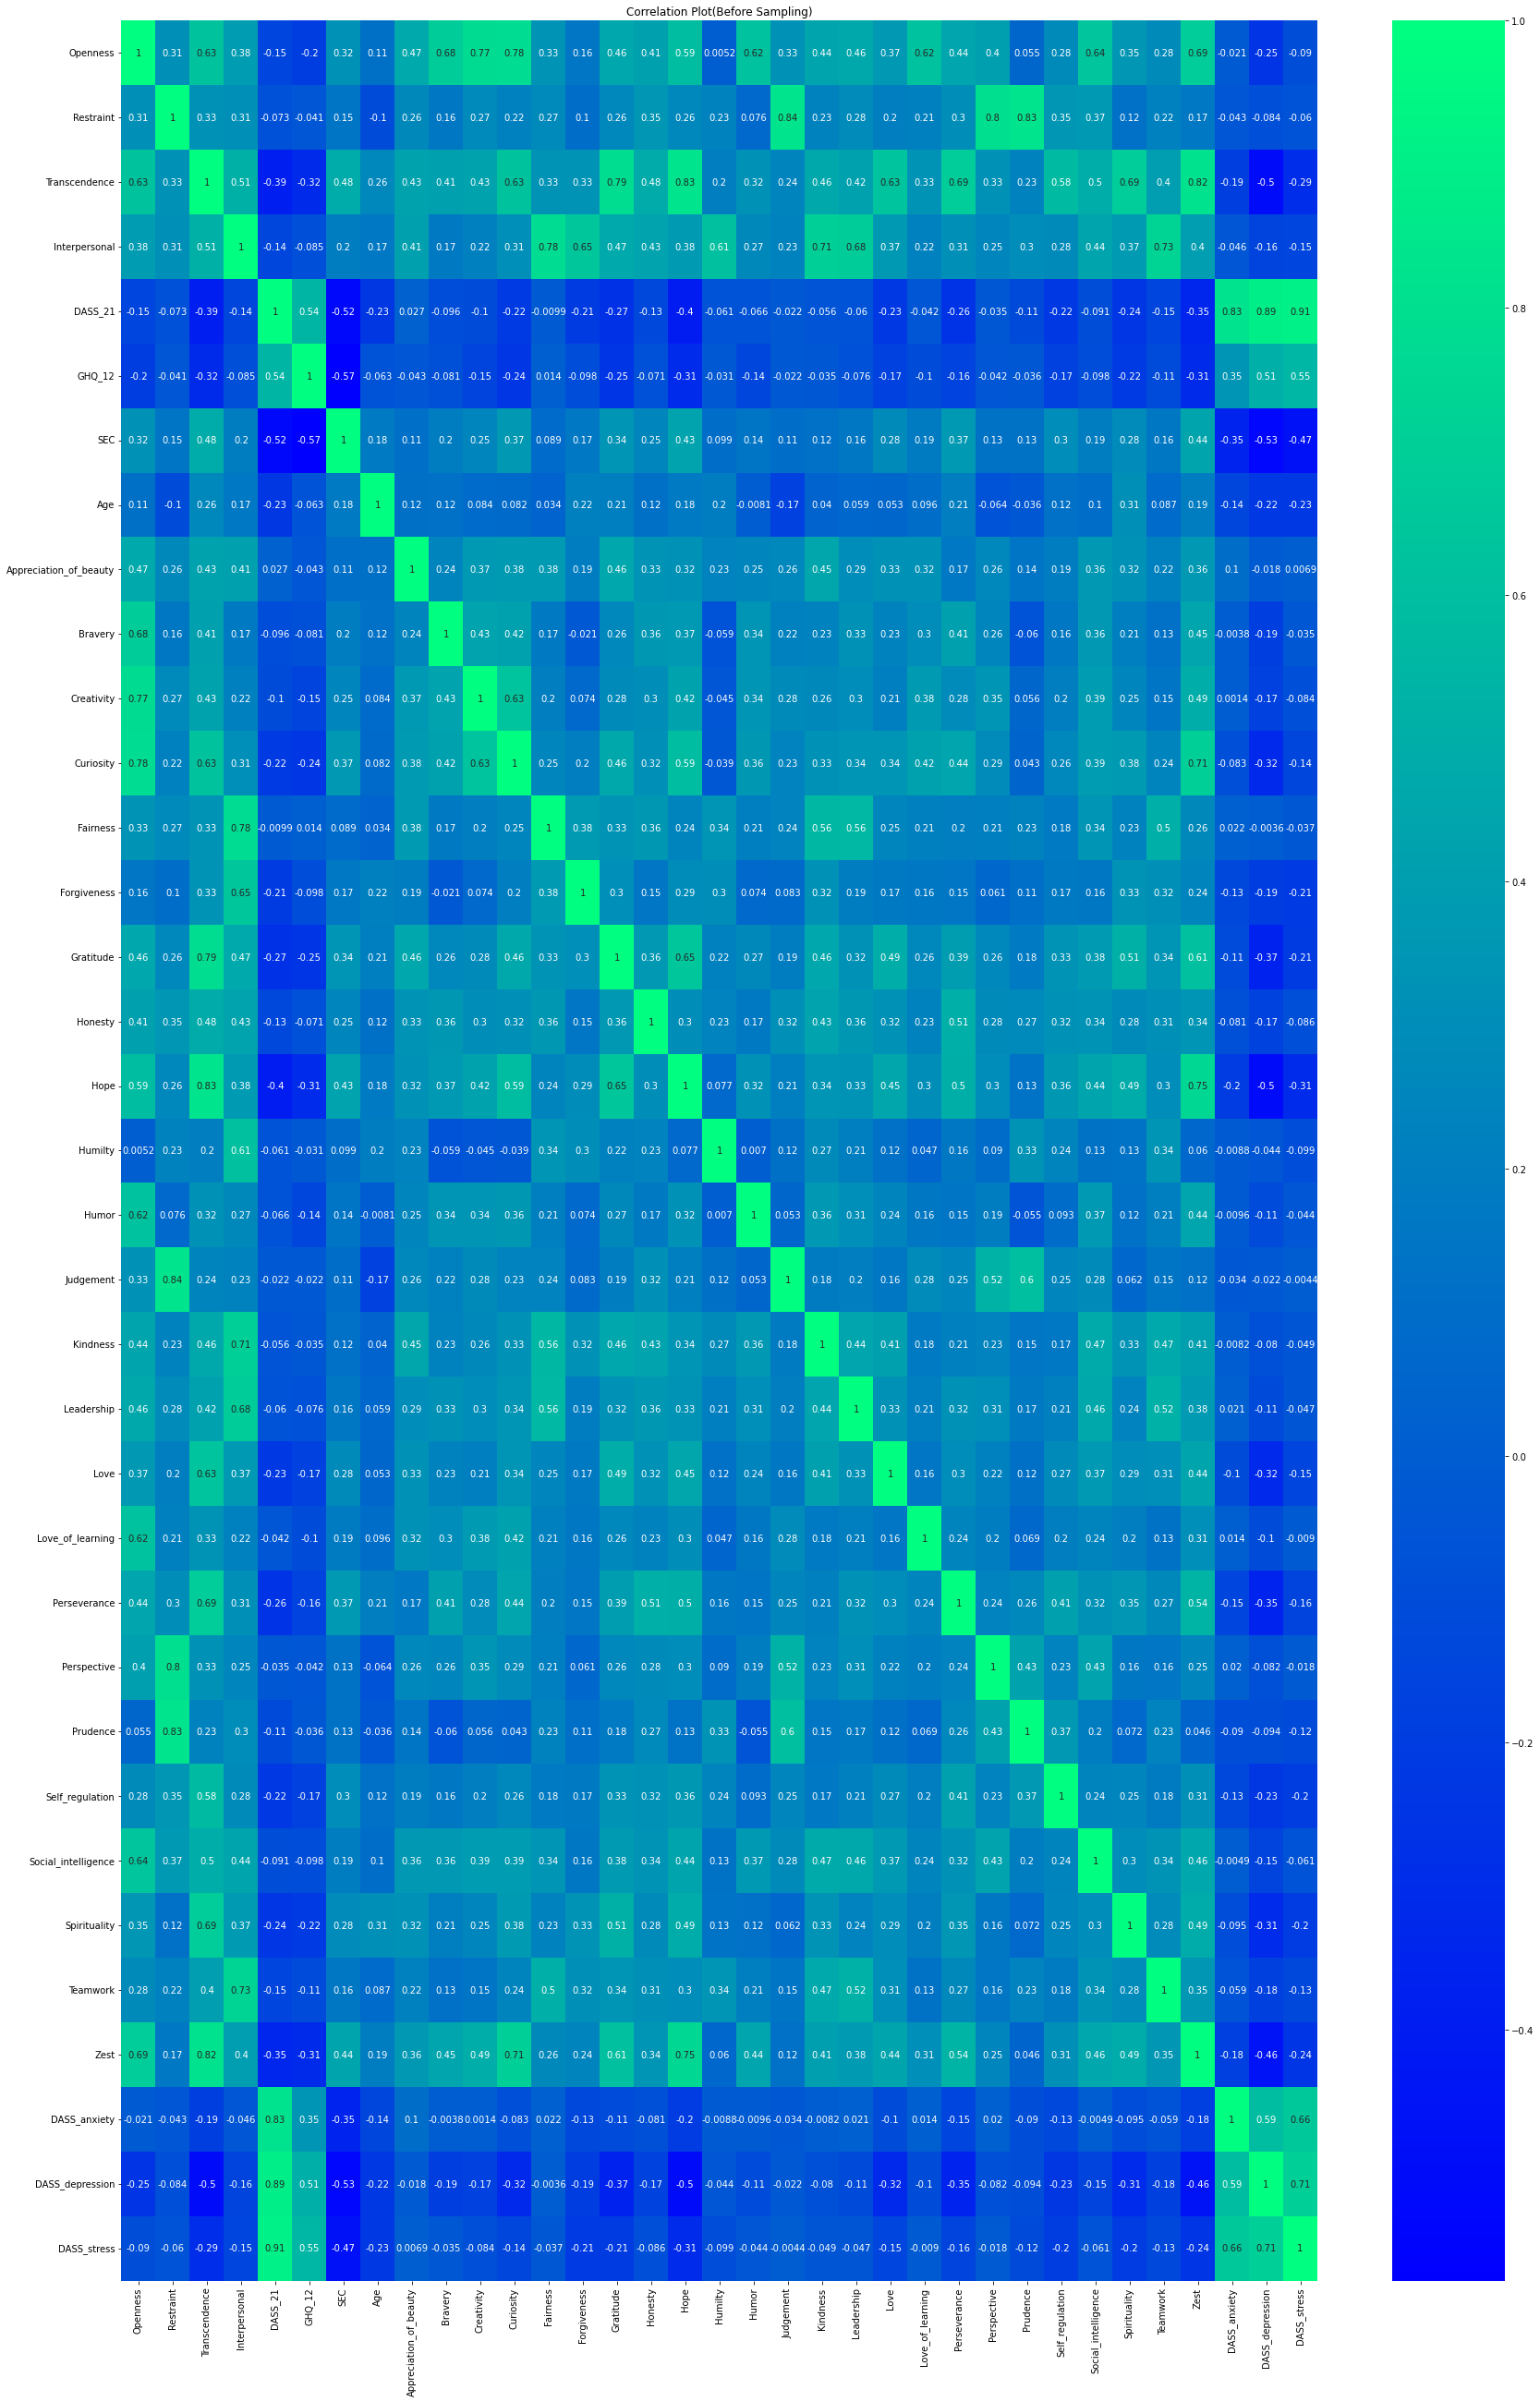

In [20]:
plt.figure(figsize= (29,45))
plt.title("Correlation Plot(Before Sampling)")
sns.heatmap(X.corr(), annot = True, cmap="winter")
plt.show()

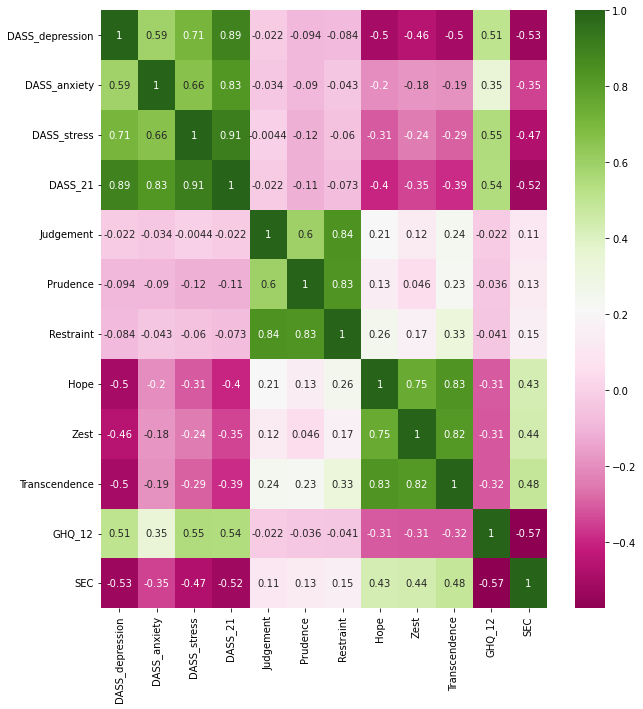

In [21]:
plt.figure(figsize = (10, 11))
heatmap = sns.heatmap(X[['DASS_depression','DASS_anxiety','DASS_stress','DASS_21','Judgement','Prudence', 'Restraint', 'Hope', 
                         'Zest', 'Transcendence', 'GHQ_12','SEC']].corr(),annot=True,cmap='PiYG')
plt.show()

#  Data Preprocessing

In [22]:
scale = StandardScaler()
X_transform = scale.fit_transform(X)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_transform,y, test_size = 0.3, random_state=42)

In [24]:
y_train.value_counts()

0    557
1    103
Name: Depression, dtype: int64

In [25]:
y_test.value_counts()

0    243
1     40
Name: Depression, dtype: int64

In [26]:
over = RandomOverSampler(sampling_strategy = 0.7, random_state = 42) 
                     
X_over_sample, y_over_sample = over.fit_resample(X_train, y_train)

In [27]:
type(X_over_sample)

numpy.ndarray

In [28]:
X_over_sample = pd.DataFrame(X_over_sample, columns = X.columns)

In [29]:
 y_over_sample.value_counts()

0    557
1    389
Name: Depression, dtype: int64

In [30]:
depression_data = pd.concat([X_over_sample,y_over_sample], axis = 1)
depression_data

,Openness,Restraint,Transcendence,Interpersonal,DASS_21,GHQ_12,SEC,Age,Appreciation_of_beauty,Bravery,...,Prudence,Self_regulation,Social_intelligence,Spirituality,Teamwork,Zest,DASS_anxiety,DASS_depression,DASS_stress,Depression
0,0.574651,-0.255692,0.285086,-0.932115,-0.850528,-0.411623,0.739601,1.569619,-0.703583,0.532882,...,-1.125652,0.921554,0.508441,-0.559728,-0.487908,0.773433,-0.871627,-0.477557,-0.932424,0
1,1.467396,1.077921,1.915077,2.224170,-1.224444,0.200618,1.993996,1.017736,-0.356575,1.786800,...,1.307563,0.921554,1.620878,1.638518,2.109414,1.338381,-0.871627,-1.148034,-1.162480,0
2,0.797838,1.344643,1.240598,-0.041881,-0.196177,0.608778,0.488722,-0.155016,1.378464,1.159841,...,0.395107,1.490474,0.879254,-0.803977,-0.116862,0.208485,0.326979,-0.477557,-0.242255,0
3,-1.657211,-1.055859,-1.120079,-0.203742,-0.944007,-0.207543,-1.016552,-0.430958,-2.438623,-1.347995,...,-0.517349,-1.069667,0.137629,-1.292477,-0.116862,-0.356462,-0.571975,-0.477557,-1.392536,0
4,-0.020512,0.011031,0.341293,0.848353,-0.570092,0.200618,-0.263915,-0.361972,1.378464,0.846361,...,-0.213197,1.206014,1.250066,0.417270,0.996276,-0.638936,0.626631,-0.701050,-1.162480,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-0.318094,-0.789137,-0.726633,0.443701,4.103850,2.649581,-2.521826,-1.051826,-0.009568,0.846361,...,-0.821500,-1.354127,0.508441,0.417270,0.996276,-0.921410,4.222450,3.545301,3.208591,1
942,-2.475561,-2.789555,-1.513525,-0.203742,1.112527,1.016939,2.495754,1.155707,-2.785631,-3.228872,...,-2.342260,0.352634,-2.087244,-1.780976,-2.343138,-0.921410,-0.871627,2.204348,1.138084,1
943,0.872233,2.011450,0.959565,1.253005,3.075582,1.016939,-1.518310,-0.706899,1.725472,-0.721036,...,1.307563,1.206014,1.620878,0.417270,0.625230,-0.356462,3.922798,2.204348,2.288366,1
944,-1.731606,0.144392,-2.131797,-0.527464,0.738612,1.425099,-2.020068,0.189911,-2.091615,-0.721036,...,0.395107,-0.785206,-1.716432,-1.536726,0.625230,-1.768832,-0.272324,1.310380,0.677971,1


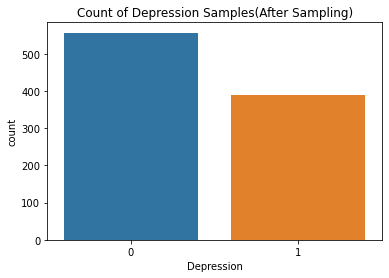

In [31]:
sns.countplot(x="Depression", data= depression_data)
plt.title("Count of Depression Samples(After Sampling)")
plt.show()

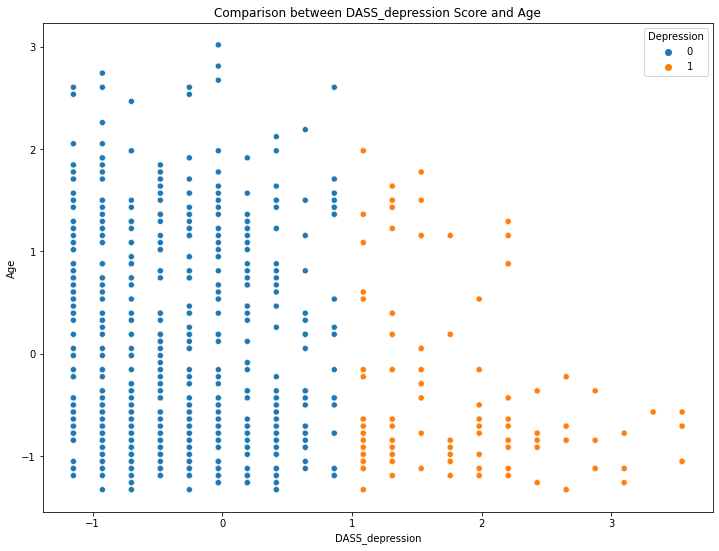

In [32]:
plt.figure(figsize=(12,9))
plt.title("Comparison between DASS_depression Score and Age")
sns.scatterplot(x= depression_data["DASS_depression"],y= depression_data["Age"],hue =depression_data["Depression"])
plt.show()

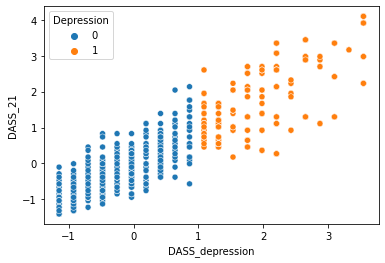

In [33]:
sns.scatterplot(x = depression_data["DASS_depression"],y = depression_data["DASS_21"],hue = depression_data["Depression"])
plt.show()

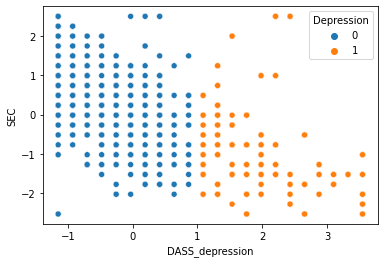

In [34]:
sns.scatterplot(x = depression_data["DASS_depression"],y = depression_data["SEC"], hue = depression_data["Depression"])
plt.show()

# Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
 
nb = GaussianNB()

In [36]:
nb.fit(X_over_sample.values, y_over_sample.values)
 
#Predict on test data
y_pred_nb = nb.predict(X_test)

In [37]:
tn_nb, fp_nb, fn_nb, tp_nb = confusion_matrix(list(y_test), list(y_pred_nb), labels=[0,1]).ravel()


print('True Negative:', tn_nb)
print('False Positive:', fp_nb)
print('False Negative:', fn_nb)
print('True Positive:', tp_nb)

True Negative: 223
False Positive: 20
False Negative: 1
True Positive: 39


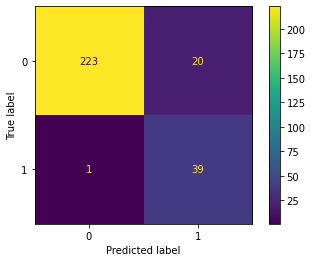

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)

In [39]:
acc_nb = accuracy_score(y_test, y_pred_nb) * 100

In [40]:
print("Accuracy: ",acc_nb)

Accuracy:  92.57950530035336


In [41]:
prec_nb = precision_score(y_test, y_pred_nb) * 100

In [42]:
print("Precision: ",prec_nb)

Precision:  66.10169491525424


In [43]:
rec_nb =  recall_score(y_test, y_pred_nb) *100

In [44]:
print("Recall: ",rec_nb)

Recall:  97.5


In [45]:
f1_nb = f1_score(y_test, y_pred_nb) *100 

In [46]:
print("F1 Score: ",f1_nb)

F1 Score:  78.78787878787878


In [47]:
fnr_score_nb = (fn_nb/(fn_nb + tp_nb))*100
print("False Negative Rate: ",fnr_score_nb)

False Negative Rate:  2.5


In [48]:
auc_nb = roc_auc_score(y_test, y_pred_nb) * 100
print('AUC Score: ',auc_nb)

AUC Score:  94.63477366255144


In [49]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       243
           1       0.66      0.97      0.79        40

    accuracy                           0.93       283
   macro avg       0.83      0.95      0.87       283
weighted avg       0.95      0.93      0.93       283



# K Nearest Neighbor

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='minkowski', n_neighbors=7, p=6)
knn.fit(X_over_sample.values, y_over_sample.values)

KNeighborsClassifier(n_neighbors=7, p=6)

In [51]:
y_pred_knn = knn.predict(X_test)

In [52]:
tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix(list(y_test), list(y_pred_knn), labels=[0,1]).ravel()


print('True Negative:', tn_knn)
print('False Positive:', fp_knn)
print('False Negative:', fn_knn)
print('True Positive:', tp_knn)

True Negative: 224
False Positive: 19
False Negative: 3
True Positive: 37


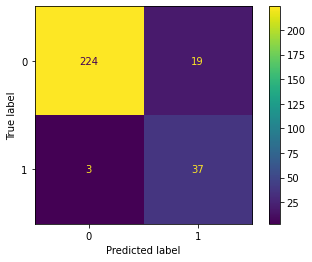

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)

In [54]:
acc_knn = accuracy_score(y_test, y_pred_knn) * 100

In [55]:
print("Accuracy: ",acc_knn)

Accuracy:  92.226148409894


In [56]:
prec_knn = precision_score(y_test, y_pred_knn) *100  

In [57]:
print("Precision: ",prec_knn)

Precision:  66.07142857142857


In [58]:
rec_knn = recall_score(y_test, y_pred_knn) *100

In [59]:
print("Recall: ",rec_knn)

Recall:  92.5


In [60]:
f1_knn = f1_score(y_test, y_pred_knn) * 100

In [61]:
 print("F1 Score: ",f1_knn)

F1 Score:  77.08333333333333


In [62]:
fnr_score_knn = (fn_knn/(fn_knn + tp_knn))*100
print("False Negative Rate: ",fnr_score_knn)

False Negative Rate:  7.5


In [63]:
auc_knn = roc_auc_score(y_test, y_pred_knn) *100
print('AUC Score: ',auc_knn)

AUC Score:  92.34053497942386


In [64]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       243
           1       0.66      0.93      0.77        40

    accuracy                           0.92       283
   macro avg       0.82      0.92      0.86       283
weighted avg       0.94      0.92      0.93       283



# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier(max_depth = 2, random_state = 42, n_estimators = 200)

In [67]:
rf.fit(X_over_sample.values, y_over_sample.values)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=42)

In [68]:
y_pred_rf = rf.predict(X_test)

In [69]:
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(list(y_test), list(y_pred_rf), labels=[0,1]).ravel()


print('True Negative:', tn_rf)
print('False Positive:', fp_rf)
print('False Negative:', fn_rf)
print('True Positive:', tp_rf)

True Negative: 236
False Positive: 7
False Negative: 1
True Positive: 39


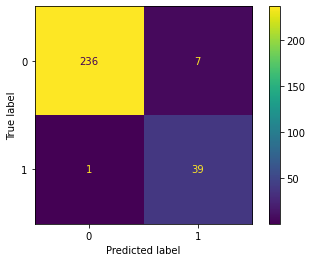

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

In [71]:
acc_rf = accuracy_score(y_test, y_pred_rf) * 100

In [72]:
print("Accuracy: ",acc_rf)

Accuracy:  97.1731448763251


In [73]:
prec_rf = precision_score(y_test, y_pred_rf) * 100

In [74]:
print("Precision :",prec_rf)

Precision : 84.78260869565217


In [75]:
rec_rf = recall_score(y_test, y_pred_rf)*100

In [76]:
print("Recall: ",rec_rf)

Recall:  97.5


In [77]:
f1_rf = f1_score(y_test, y_pred_rf)*100

In [78]:
print("F1 Score: ",f1_rf)

F1 Score:  90.69767441860466


In [79]:
fnr_score_rf = (fn_rf/(fn_rf + tp_rf)) * 100
print("False Negative Rate: ",fnr_score_rf)

False Negative Rate:  2.5


In [80]:
auc_rf = roc_auc_score(y_test, y_pred_rf) * 100
print('AUC Score: ',auc_rf)

AUC Score:  97.309670781893


In [81]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       243
           1       0.85      0.97      0.91        40

    accuracy                           0.97       283
   macro avg       0.92      0.97      0.95       283
weighted avg       0.97      0.97      0.97       283



# Multi Layer Perceptron

In [82]:
from sklearn.neural_network import MLPClassifier

In [83]:
mlp = MLPClassifier(hidden_layer_sizes=(15, 17, 25, 30, 35), activation = 'relu', max_iter = 700)

In [84]:
mlp.fit(X_over_sample.values, y_over_sample.values)

MLPClassifier(hidden_layer_sizes=(15, 17, 25, 30, 35), max_iter=700)

In [85]:
y_pred_mlp = mlp.predict(X_test)

In [86]:
tn_mlp, fp_mlp, fn_mlp, tp_mlp = confusion_matrix(list(y_test), list(y_pred_mlp), labels = [0,1]).ravel()

print('True Negative:', tn_mlp)
print('False Positive:', fp_mlp)
print('False Negative:', fn_mlp)
print('True Positive:', tp_mlp)

True Negative: 238
False Positive: 5
False Negative: 6
True Positive: 34


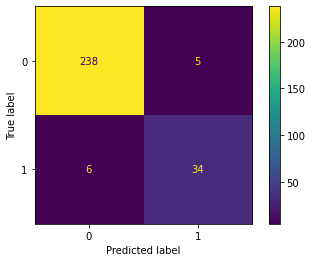

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)

In [88]:
acc_mlp = accuracy_score(y_test, y_pred_mlp) * 100

In [89]:
print("Accuracy: ", acc_mlp)

Accuracy:  96.113074204947


In [90]:
prec_mlp = precision_score(y_test, y_pred_mlp) * 100

In [91]:
print("Precision: ",prec_mlp)

Precision:  87.17948717948718


In [92]:
rec_mlp = recall_score(y_test, y_pred_mlp) * 100

In [93]:
print("Recall: ",rec_mlp)

Recall:  85.0


In [94]:
f1_mlp = f1_score(y_test, y_pred_mlp) * 100

In [95]:
print("F1 Score: ",f1_mlp)

F1 Score:  86.07594936708861


In [96]:
fnr_score_mlp = (fn_mlp/(fn_mlp + tp_mlp)) * 100
print("False Negative Rate: ",fnr_score_mlp)

False Negative Rate:  15.0


In [97]:
auc_mlp = roc_auc_score(y_test, y_pred_mlp) * 100
print('AUC Score: ',auc_mlp)

AUC Score:  91.47119341563787


In [98]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.87      0.85      0.86        40

    accuracy                           0.96       283
   macro avg       0.92      0.91      0.92       283
weighted avg       0.96      0.96      0.96       283



# Majority Voting Classifier

In [99]:
from sklearn.ensemble import VotingClassifier

In [100]:
mvc = VotingClassifier(estimators = [('Naive Bayes', nb),('K Nearest Neighbor', knn),('Random Forest', rf), ('Multilayer Perceptron', mlp)], voting = 'hard')

In [101]:
mvc.fit(X_over_sample.values, y_over_sample.values)

VotingClassifier(estimators=[('Naive Bayes', GaussianNB()),
                             ('K Nearest Neighbor',
                              KNeighborsClassifier(n_neighbors=7, p=6)),
                             ('Random Forest',
                              RandomForestClassifier(max_depth=2,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('Multilayer Perceptron',
                              MLPClassifier(hidden_layer_sizes=(15, 17, 25, 30,
                                                                35),
                                            max_iter=700))])

In [102]:
y_pred_mvc = mvc.predict(X_test)

In [103]:
tn_mvc, fp_mvc, fn_mvc, tp_mvc = confusion_matrix(list(y_test), list(y_pred_mvc), labels = [0, 1]).ravel()
print("True Negative: ", tn_mvc)
print("False Positive: ", fp_mvc)
print("False Negative: ", fn_mvc)
print("True Positive: ", tp_mvc)

True Negative:  237
False Positive:  6
False Negative:  2
True Positive:  38


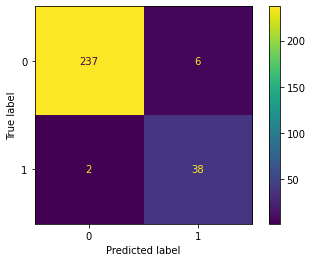

In [104]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mvc)

In [105]:
acc_mvc = accuracy_score(y_test, y_pred_mvc) * 100

In [106]:
print("Accuracy: ",acc_mvc)

Accuracy:  97.1731448763251


In [107]:
prec_mvc = precision_score(y_test, y_pred_mvc) * 100

In [108]:
print("Precision: ",prec_mvc)

Precision:  86.36363636363636


In [109]:
rec_mvc = recall_score(y_test, y_pred_mvc)* 100

In [110]:
print("Recall: ",rec_mvc)

Recall:  95.0


In [111]:
f1_mvc = f1_score(y_test, y_pred_mvc)* 100

In [112]:
print("F1 Score: ",f1_mvc)

F1 Score:  90.47619047619048


In [113]:
fnr_score_mvc = (fn_mvc/(fn_mvc + tp_mvc)) * 100
print("False Negative Rate: ",fnr_score_mvc)

False Negative Rate:  5.0


In [114]:
auc_mvc = roc_auc_score(y_test, y_pred_mvc) * 100
print('AUC Score: ',auc_mvc)

AUC Score:  96.26543209876543


In [115]:
print(classification_report(y_test, y_pred_mvc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       243
           1       0.86      0.95      0.90        40

    accuracy                           0.97       283
   macro avg       0.93      0.96      0.94       283
weighted avg       0.97      0.97      0.97       283



# ROC AUC Curve

In [116]:
fpr_nb, tpr_nb, thresh_nb = roc_curve(y_test, y_pred_nb)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, y_pred_knn)
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, y_pred_rf)
fpr_mlp, tpr_mlp, thresh_mlp = roc_curve(y_test, y_pred_mlp)


In [117]:
# ROC Curve for tpr = fpr
rand_prob = [0 for i in range(len(y_test))]
r_fpr, r_tpr, _ = roc_curve(y_test, rand_prob, pos_label = 1)

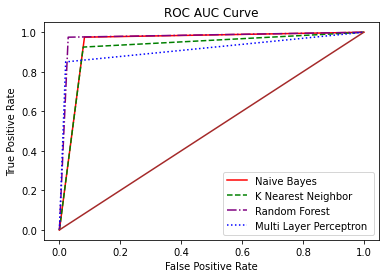

In [118]:
plt.plot(fpr_nb, tpr_nb, linestyle='-',color = 'red', label = 'Naive Bayes ')
plt.plot(fpr_knn, tpr_knn, linestyle = '--', color = 'green', label = 'K Nearest Neighbor ')
plt.plot(fpr_rf, tpr_rf, linestyle='-.',color = 'purple', label = 'Random Forest ')
plt.plot(fpr_mlp, tpr_mlp, linestyle = 'dotted', color = 'blue', label = 'Multi Layer Perceptron ')
plt.plot(r_fpr, r_tpr, linestyle = 'solid', color = 'brown')

plt.title("ROC AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc ='best')
plt.savefig('ROC_AUC', dpi = 400)
plt.show()


# Comparing Recall(True Positive Rates) of Models



Naive Bayes 97.5
K Nearest Neighbor 92.5
Random Forest 97.5
Multi Layer Perceptron 85.0
Majority Voting Classifier 95.0


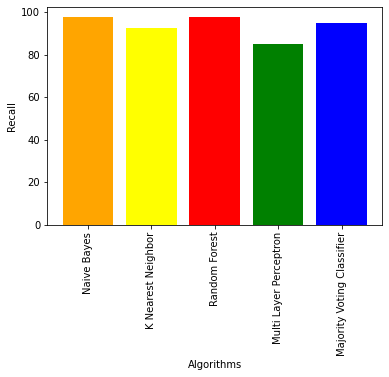

In [119]:
tpr_models = {"Naive Bayes": rec_nb, "K Nearest Neighbor": rec_knn, "Random Forest": rec_rf, 
              "Multi Layer Perceptron": rec_mlp, "Majority Voting Classifier": rec_mvc}
for key, value in tpr_models.items():
    print (key, value)
    
tpr_keys = list(tpr_models.keys())
tpr_values = list(tpr_models.values())

plt.bar(range(len(tpr_models)), tpr_values, tick_label=tpr_keys,color=['orange', 'yellow', 'red', 'green', 'blue'])
plt.xticks(rotation = 90)
plt.xlabel("Algorithms")
plt.ylabel("Recall")
plt.show()

# Comparing False Negative Rates of Models

Naive Bayes 2.5
K Nearest Neighbor 7.5
Random Forest 2.5
Multi Layer Perceptron 15.0
Majority Voting Classifier 5.0


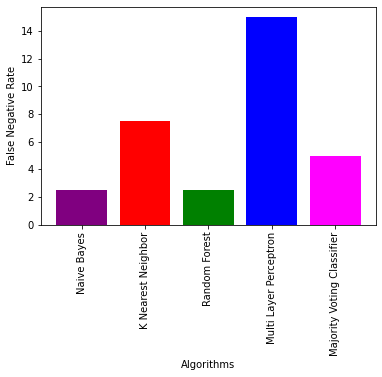

In [120]:
fnr_models = {"Naive Bayes": fnr_score_nb, "K Nearest Neighbor": fnr_score_knn, "Random Forest": fnr_score_rf, 
              "Multi Layer Perceptron": fnr_score_mlp, "Majority Voting Classifier": fnr_score_mvc}
for key, value in fnr_models.items():
    print (key, value)
    
fnr_keys = list(fnr_models.keys())
fnr_values = list(fnr_models.values())

plt.bar(range(len(fnr_models)), fnr_values, tick_label=fnr_keys,color=['purple', 'red', 'green', 'blue', 'magenta'])
plt.xticks(rotation = 90)
plt.xlabel("Algorithms")
plt.ylabel("False Negative Rate")
plt.show()

# Comparing AUC Scores of Models

Naive Bayes 94.63477366255144
K Nearest Neighbor 92.34053497942386
Random Forest 97.309670781893
Multi Layer Perceptron 91.47119341563787
Majority Voting Classifier 96.26543209876543


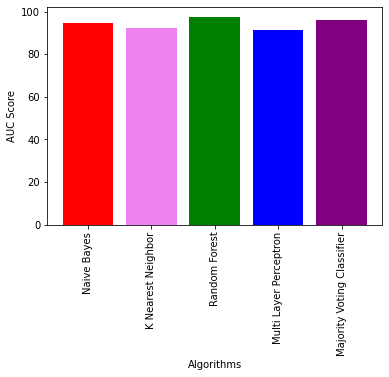

In [121]:
auc_models = {"Naive Bayes": auc_nb, "K Nearest Neighbor": auc_knn, "Random Forest": auc_rf, 
              "Multi Layer Perceptron": auc_mlp, "Majority Voting Classifier": auc_mvc}
for key, value in auc_models.items():
    print (key, value)
    
auc_keys = list(auc_models.keys())
auc_values = list(auc_models.values())

plt.bar(range(len(auc_models)), auc_values, tick_label=auc_keys,color=['red', 'violet', 'green', 'blue', 'purple'])
plt.xticks(rotation = 90)
plt.xlabel("Algorithms")
plt.ylabel("AUC Score")
plt.show()

# Comparing Performance of Models

<Figure size 1080x1368 with 0 Axes>

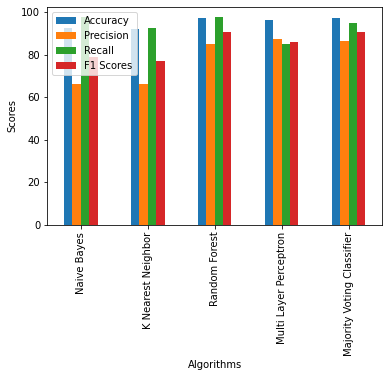

<Figure size 1080x1368 with 0 Axes>

In [122]:
models_data = pd.DataFrame([['Naive Bayes', acc_nb, prec_nb, rec_nb, f1_nb], ['K Nearest Neighbor', acc_knn, prec_knn, rec_knn, f1_knn],
                          ['Random Forest', acc_rf, prec_rf, rec_rf, f1_rf], ['Multi Layer Perceptron', acc_mlp, prec_mlp, rec_mlp, f1_mlp],
                         ['Majority Voting Classifier', acc_mvc, prec_mvc, rec_mvc, f1_mvc]],  columns = ['Scores','Accuracy', 'Precision', 'Recall', 'F1 Scores'])

models_data.plot(x='Scores', kind ='bar', stacked = False, xlabel = 'Algorithms', ylabel = 'Scores')
plt.figure(figsize = (15, 19))